In [1]:
from pathlib import Path

from IPython.display import Audio
import numpy as np
from torchaudio.transforms import MelSpectrogram
import torchaudio
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [ ]:
drone_files = list(Path("../data/raw/train/drone").glob("*.wav"))
drone_sounds = [torchaudio.load(f) for f in drone_files]

sample_audio, sample_rate = drone_sounds[9]
Audio(sample_audio, rate=sample_rate)

/var/home/saps/synced/cloud-sync/Education/DTU/Miscellaneous/defence-tech-project/.venv/lib/python3.13/site-packages/torchaudio/_backend/utils.py:213: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.load_with_torchcodec` under the hood. Some parameters like ``normalize``, ``format``, ``buffer_size``, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's decoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.decoders.AudioDecoder.html#torchcodec.decoders.AudioDecoder.
  warnings.warn(


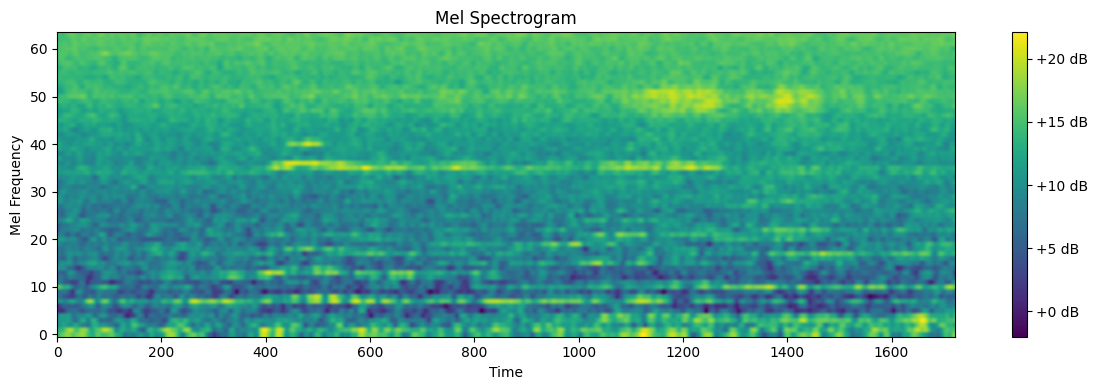

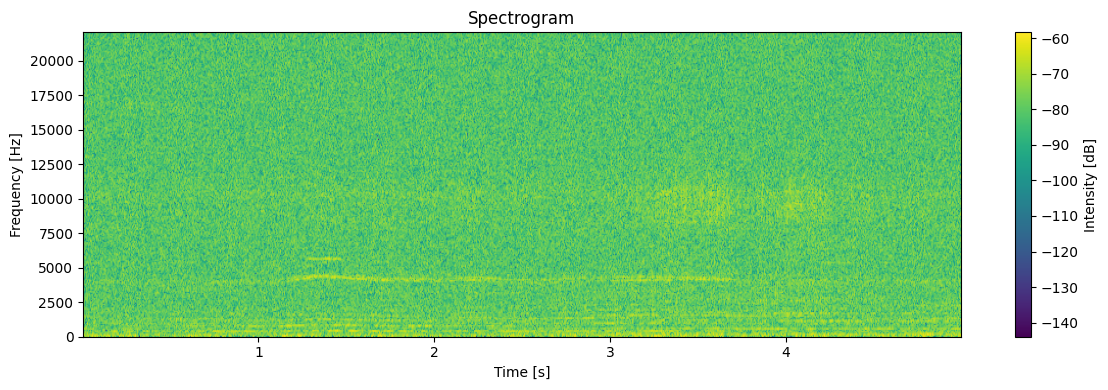

In [40]:
def plot_mel_spectrogram(sound, rate):
    plt.figure(figsize=(12, 4))
    to_mel_spectrogram = MelSpectrogram(sample_rate=rate, n_mels=64, n_fft=4096, hop_length=128)
    mel_spectrogram = to_mel_spectrogram(sound)
    mel_spectrogram_db = 10 * np.log10(mel_spectrogram.numpy() + 1e-10)  # Convert to dB scale
    plt.imshow(mel_spectrogram_db[0], aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    plt.tight_layout()
    plt.show()

def plot_spectrogram(sound, rate):
    plt.figure(figsize=(12, 4))
    plt.specgram(sound.numpy()[0], Fs=rate, NFFT=512, noverlap=256, cmap='viridis')
    plt.colorbar(label='Intensity [dB]')
    plt.title('Spectrogram')
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.tight_layout()
    plt.show()


plot_mel_spectrogram(sample_audio, sample_rate)
plot_spectrogram(sample_audio, sample_rate)